In [1]:
import pandas as pd
import numpy as np
import json
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:

import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)




In [3]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [4]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [5]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)


x_train  (25000, 10000)
x_test  (25000, 10000)


In [7]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)





y_train  (25000,)
y_test  (25000,)


In [8]:
batch_size = 32
epochs = 2
# Build the model

model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 22500 samples, validate on 2500 samples
Epoch 1/2
22500/22500 [==============================] - 70s 3ms/step - loss: 7.9492 - acc: 0.5014 - val_loss: 8.1689 - val_acc: 0.4876
Epoch 2/2
22500/22500 [==============================] - 68s 3ms/step - loss: 7.9492 - acc: 0.5014 - val_loss: 8.1689 - val_acc: 0.4876


In [9]:
df=pd.read_json("Team12_Chevron.json")

In [10]:
df.head(5)

,text,sentiment
1,Good morning. My name is Jonathan and I will b...,neutral
10,"Thanks Mike. Turning to Slide 5, an overview o...",neutral
100,"And so, there are times when we can fall in lo...",negative
101,Our next question comes from the line of Sam M...,neutral
102,"Mike, I'm going to try to not ask you to say t...",neutral


In [11]:
df['sentiment'].value_counts()

neutral     54
positive    45
negative    29
Name: sentiment, dtype: int64

In [12]:
newdf= df[df.sentiment != 'neutral']


In [13]:
newdf['sentiment'].value_counts()

positive    45
negative    29
Name: sentiment, dtype: int64

In [14]:
test_size = int(len(newdf) * 1)
print ("Test size: %d" % test_size)


Test size: 74


In [15]:
test_posts = newdf['text'][:test_size]
test_tags = newdf['sentiment'][:test_size]



In [16]:
max_words = 10000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [17]:
tokenize.fit_on_texts(test_posts) # only fit on train
x_test = tokenize.texts_to_matrix(test_posts)


In [18]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(test_tags)
y_test = encoder.transform(test_tags)


In [19]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_test shape:', x_test.shape)

print('y_test shape:', y_test.shape)


x_test shape: (74, 10000)
y_test shape: (74,)


In [20]:

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

74/74 [==============================] - 0s 442us/step
Test score: 6.24769164420463
Test accuracy: 0.6081081089135763


In [21]:
y_pred=model.predict(x_test)
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [22]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

And so, there are times when we can fall in love w ...
Actual label:negative
Predicted label: negative

So I think the increase performance of the Permian ...
Actual label:positive
Predicted label: negative

And we have increased the dividend that Pat has al ...
Actual label:positive
Predicted label: negative

Okay. And just on a related note; I guess this one ...
Actual label:negative
Predicted label: negative

Sam, we don’t have a target leverage rate, we thin ...
Actual label:negative
Predicted label: negative

So, I think that’s really what we are trying to -- ...
Actual label:positive
Predicted label: negative

For the full year earnings excluding special items ...
Actual label:positive
Predicted label: negative

We’re still very positive on the petrochemical inv ...
Actual label:negative
Predicted label: negative

And Mike, we always appreciate you getting on thes ...
Actual label:negative
Predicted label: negative

So it's not something that I can project with any  ...
Actual la

In [23]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

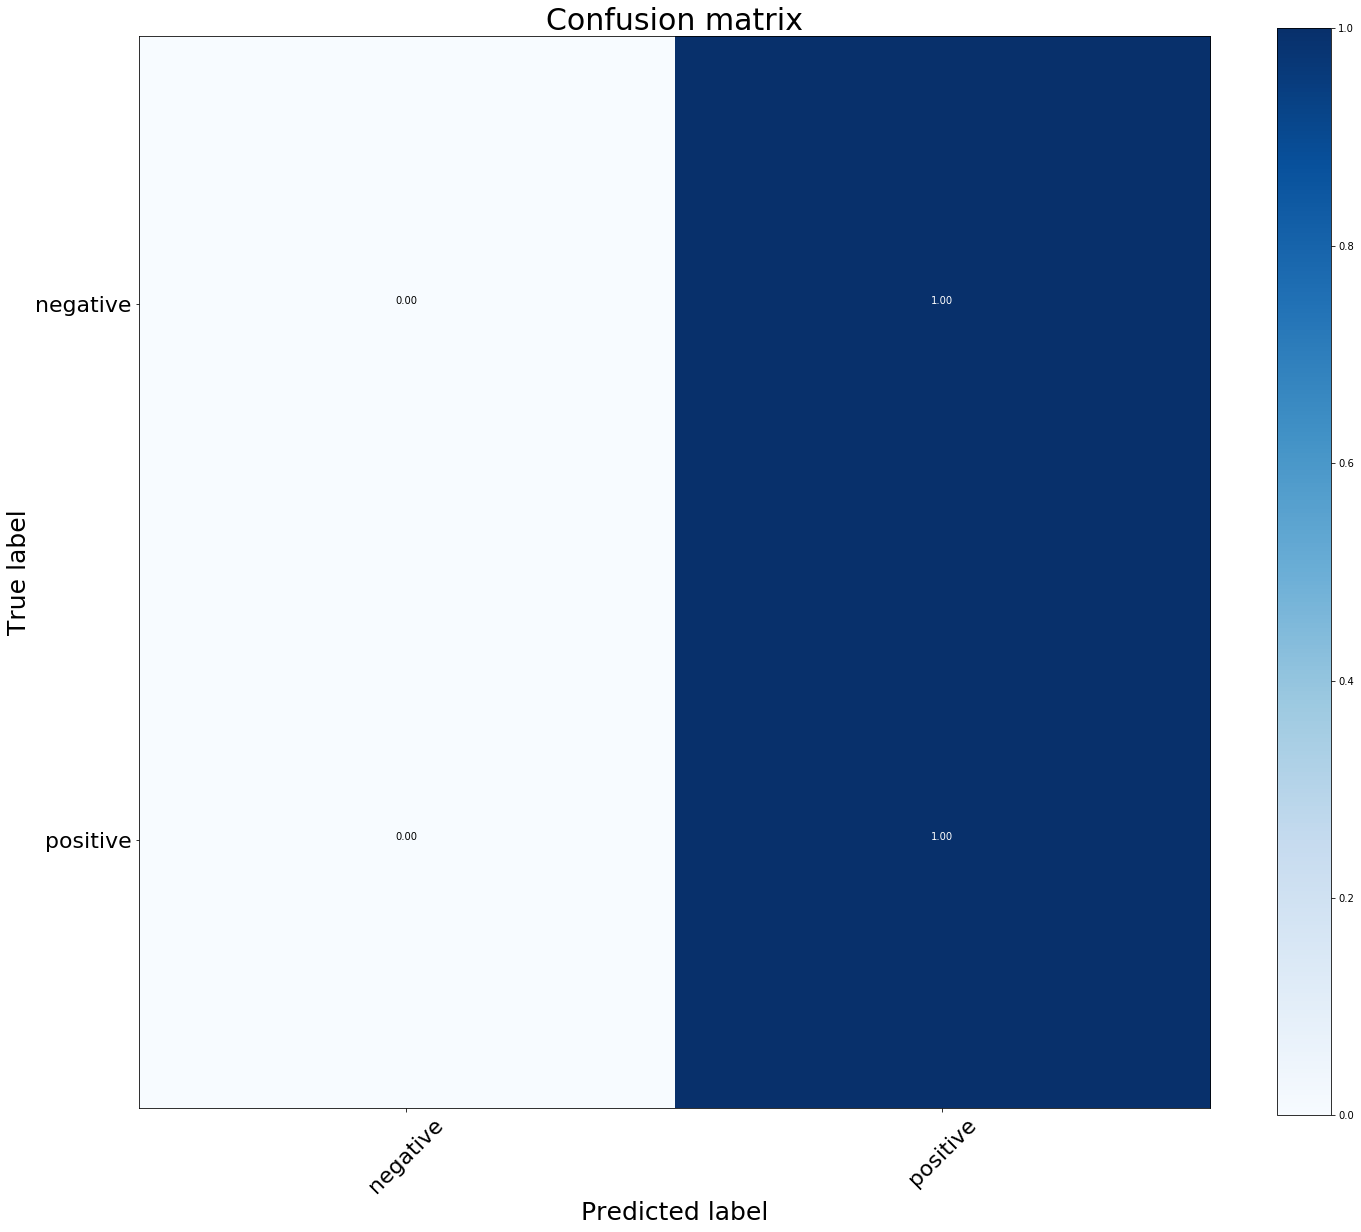

In [24]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()